# Healthy Food Stores Opening in Barcelona

## 1. Libraries installing and importing

In [1]:
import pandas as pd

In [2]:
import numpy as np
import requests

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

## 2. Dataframe creation

**We first create the Dataframe with all the neighbourhoods based on the Metro Stations**

In [4]:
BCN_Neig=pd.read_excel('Estacions Metro BCN.xlsx')

In [5]:
BCN_Neig.head()

,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,DATA,GEOMETRY,Long,Lat
0,6660111,Hospital de Bellvitge,L1,2020-04-14,POINT,2.107242,41.344677
1,6660112,Bellvitge,L1,2020-04-14,POINT,2.110918,41.350974
2,6660113,Av. Carrilet,L1,2020-04-14,POINT,2.102645,41.358522
3,6660114,Rambla Just Oliveras,L1,2020-04-14,POINT,2.099749,41.364090
4,6660115,Can Serra,L1,2020-04-14,POINT,2.102755,41.367693


We drop non usefull columns to clean the data

In [6]:
BCN_Neig.drop(['DATA','GEOMETRY'],axis=1,inplace=True)
BCN_Neig.head()

,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,Long,Lat
0,6660111,Hospital de Bellvitge,L1,2.107242,41.344677
1,6660112,Bellvitge,L1,2.110918,41.350974
2,6660113,Av. Carrilet,L1,2.102645,41.358522
3,6660114,Rambla Just Oliveras,L1,2.099749,41.364090
4,6660115,Can Serra,L1,2.102755,41.367693


**We then import and Clean the rent price Dataframe**

In [7]:
BCN_Price=pd.read_excel('Preu lloguer per estacio.xlsx')
BCN_Price.drop(['CODI_GRUP_ESTACIO','PICTO','GEOMETRY'],axis=1,inplace=True)
BCN_Price.head()

,NOM_ESTACIO,PREU (€/M2)
0,Hospital de Bellvitge,12.78
1,Bellvitge,12.85
2,Av. Carrilet,13.11
3,Rambla Just Oliveras,13.23
4,Can Serra,13.33


**Finally we merge both Dataframes to obain an unique table**

In [8]:
BCN_Data = pd.merge(BCN_Neig,BCN_Price,on='NOM_ESTACIO')
BCN_Data.head()

,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,Long,Lat,PREU (€/M2)
0,6660111,Hospital de Bellvitge,L1,2.107242,41.344677,12.78
1,6660112,Bellvitge,L1,2.110918,41.350974,12.85
2,6660113,Av. Carrilet,L1,2.102645,41.358522,13.11
3,6660114,Rambla Just Oliveras,L1,2.099749,41.364090,13.23
4,6660115,Can Serra,L1,2.102755,41.367693,13.33


## 3. Foursquare Venue Data Obtaining

In [9]:
CLIENT_ID = 'KMOYCVUPEQ1AQ554U3NXR1POGLOYYUABLSXGD5BYCE2UAS0R' # your Foursquare ID
CLIENT_SECRET = '0OUZCGDDLTQQDGJRCGZSLRSYX5TSCTXCLAWM0TAYQEMC0KVX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KMOYCVUPEQ1AQ554U3NXR1POGLOYYUABLSXGD5BYCE2UAS0R
CLIENT_SECRET:0OUZCGDDLTQQDGJRCGZSLRSYX5TSCTXCLAWM0TAYQEMC0KVX


**We define the function to obtain the venues**

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We include the data in the table BCN_Data and launch the search

In [ ]:
LIMIT = 100
barcelona_venues = getNearbyVenues(names=BCN_Data['NOM_ESTACIO'],
                                   latitudes=BCN_Data['Lat'],
                                   longitudes=BCN_Data['Long']
                                  )




**We can analyze initial aspect of the search, shape for the Dataframe and number of venues by neighbourhood**

In [32]:
barcelona_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hospital de Bellvitge,41.344677,2.107242,Hesperia Tower,41.346008,2.108368,Hotel
1,Hospital de Bellvitge,41.344677,2.107242,Metropolitan Gran Via,41.346588,2.109433,Gym
2,Hospital de Bellvitge,41.344677,2.107242,Evo,41.346052,2.108572,Molecular Gastronomy Restaurant
3,Hospital de Bellvitge,41.344677,2.107242,Polideportivo Sergio Manzano,41.348778,2.106045,Gym / Fitness Center
4,Hospital de Bellvitge,41.344677,2.107242,Bouquet,41.346057,2.108391,Restaurant


In [33]:
barcelona_venues.shape

(5288, 7)

In [29]:
BCN_Hist = barcelona_venues.groupby('Neighborhood').count()
BCN_Hist = BCN_Hist[['Venue']]
BCN_Hist.sort_values(by = 'Venue', ascending = False, inplace= True)

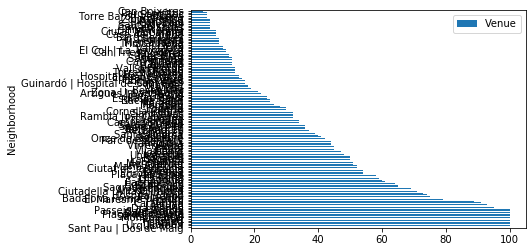

In [31]:
import matplotlib as mlt

BCN_Hist.plot(kind='barh')

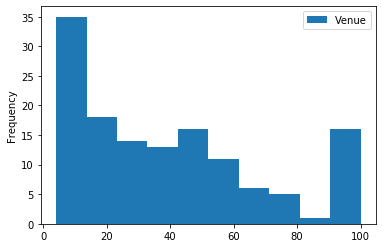

In [32]:
BCN_Hist.plot(kind='hist')

## 4. Exploratory Data Analysis

**We transform categorical Data of venues into dummies to be able to count it**

In [33]:
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
barcelona_onehot['Neighborhood'] = barcelona_venues['Neighborhood'] 

In [34]:
barcelona_onehot.columns

Index(['Accessories Store', 'Airport', 'Airport Lounge', 'Airport Service',
       'Airport Terminal', 'American Restaurant', 'Amphitheater',
       'Antique Shop', 'Aquarium', 'Arcade',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Warehouse', 'Warehouse Store',
       'Wine Bar', 'Wine Shop', 'Winery', 'Women's Store', 'Yoga Studio',
       'Zoo'],
      dtype='object', length=310)

**We insert column with neighborhoods at the beginning**

In [35]:
Estacio = barcelona_onehot['Neighborhood']
barcelona_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
barcelona_onehot.insert(0, 'Neighborhood', Estacio)
barcelona_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Hospital de Bellvitge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hospital de Bellvitge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hospital de Bellvitge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hospital de Bellvitge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hospital de Bellvitge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We then group venues by neighborhoods into two tables: One with the rate of each venue to generate the clusters, and one with the totals, which will be used to evaluate the already open places

In [36]:
barcelona_grouped = barcelona_onehot.groupby('Neighborhood').mean().reset_index()
barcelona_grouped.head()

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Aeroport T1,0.000000,0.000000,0.108108,0.081081,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.027027,0.000000,0.0
1,Aeroport T2,0.000000,0.027778,0.027778,0.138889,0.027778,0.0,0.0,0.0,0.0,...,0.0,0.0,0.027778,0.0,0.0,0.000000,0.0,0.027778,0.000000,0.0
2,Alfons X,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,Arc de Triomf,0.014493,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.014493,0.0,0.000000,0.014493,0.0
4,Artigues | Sant Adrià,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [37]:
barcelona_grouped_totals=barcelona_onehot.groupby('Neighborhood').sum().reset_index()
barcelona_grouped_totals.head()

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Aeroport T1,0,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Aeroport T2,0,1,1,5,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,Alfons X,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arc de Triomf,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,Artigues | Sant Adrià,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Obtaining most common venues by Neighborhood

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = barcelona_grouped['Neighborhood']

for ind in np.arange(barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aeroport T1,Airport Lounge,Clothing Store,Spanish Restaurant,Airport Service,Coffee Shop,Bookstore,Café,Sporting Goods Shop,Rental Car Location,Duty-free Shop
1,Aeroport T2,Rental Car Location,Airport Service,Café,Clothing Store,Bakery,Indoor Play Area,Smoke Shop,Museum,Sporting Goods Shop,Bus Stop
2,Alfons X,Bakery,Café,Grocery Store,Tapas Restaurant,Chinese Restaurant,Park,Gym,Spanish Restaurant,Diner,Deli / Bodega
3,Arc de Triomf,Hotel,Coffee Shop,Hostel,Pizza Place,French Restaurant,Gym,Bistro,Italian Restaurant,Tapas Restaurant,Sandwich Place
4,Artigues | Sant Adrià,Sandwich Place,Tapas Restaurant,Grocery Store,Supermarket,Café,Plaza,Park,Cheese Shop,Dessert Shop,Burger Joint


### Modelling Neighbourhoods into clusters

In [40]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [46]:
# We set initial number of clusters = 5
kclusters = 5
barcelona_grouped_clustering = barcelona_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 2, 0, 2, 0, 2, 2, 0], dtype=int32)

**We calculate distortion for each K in order to select the most suitable value with the elbow method**

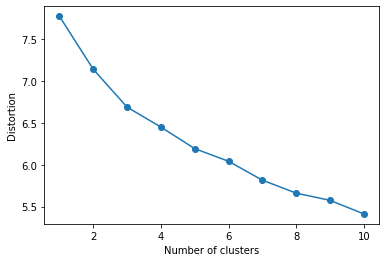

In [45]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(barcelona_grouped_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As it can be seen in the graph, there are more than one elbow, and slope variation keep almost constant with each value of k, so we decide to keep k=5 as ii is the most pronunciated elbow in the graph. **We then merge cluster labels obtained with k=5 with original data**

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

barcelona_merged = BCN_Data

# merge data with the original Dataframe
barcelona_merged = barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='NOM_ESTACIO')

In [48]:
barcelona_merged.head()

,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,Long,Lat,PREU (€/M2),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6660111,Hospital de Bellvitge,L1,2.107242,41.344677,12.78,1,Soccer Field,Hotel,Bus Station,Tennis Court,Café,Metro Station,Grocery Store,Gym,Gym / Fitness Center,Electronics Store
1,6660112,Bellvitge,L1,2.110918,41.350974,12.85,1,Café,Grocery Store,Historic Site,Snack Place,Fast Food Restaurant,Metro Station,Bar,Park,Gym / Fitness Center,Chinese Restaurant
2,6660113,Av. Carrilet,L1,2.102645,41.358522,13.11,2,Restaurant,Mediterranean Restaurant,Pizza Place,Spanish Restaurant,Bar,Tapas Restaurant,Pub,Nightclub,Cocktail Bar,Cultural Center
3,6660114,Rambla Just Oliveras,L1,2.099749,41.364090,13.23,2,Restaurant,Pizza Place,Café,Bar,Bookstore,Beer Store,Sandwich Place,Tapas Restaurant,Bakery,Grocery Store
4,6660115,Can Serra,L1,2.102755,41.367693,13.33,1,Park,Tapas Restaurant,Grocery Store,Beer Store,Bar,Basketball Court,Farmers Market,Spanish Restaurant,Snack Place,Soccer Stadium


We Obtain Some Cluster Insights by **counting the most common venue categories in the neighborhoods on each Cluster**

**Cluster 0**

In [67]:
Barcelona_C0 = barcelona_merged.loc[barcelona_merged['Cluster Labels']==0]
Barcelona_C0['1st Most Common Venue'].value_counts()

Tapas Restaurant            17
Supermarket                  4
Grocery Store                3
Café                         2
Mediterranean Restaurant     2
Department Store             1
Sandwich Place               1
Coffee Shop                  1
Plaza                        1
Name: 1st Most Common Venue, dtype: int64

**Cluster 1**

In [68]:
Barcelona_C1 = barcelona_merged.loc[barcelona_merged['Cluster Labels']==1]
Barcelona_C1['1st Most Common Venue'].value_counts()

Park                  5
Spanish Restaurant    5
Grocery Store         4
Bakery                2
Soccer Field          1
Metro Station         1
Sports Club           1
Café                  1
History Museum        1
Music Venue           1
Plaza                 1
Gym                   1
Name: 1st Most Common Venue, dtype: int64

**Cluster 2**

In [70]:
Barcelona_C2 = barcelona_merged.loc[barcelona_merged['Cluster Labels']==2]
Barcelona_C2['1st Most Common Venue'].value_counts()

Hotel                       16
Mediterranean Restaurant     9
Spanish Restaurant           8
Bar                          5
Café                         5
Restaurant                   4
Tapas Restaurant             3
Pizza Place                  3
Clothing Store               3
Rental Car Location          2
Nightclub                    2
Plaza                        2
Japanese Restaurant          1
Boat or Ferry                1
Gym                          1
Grocery Store                1
Airport Lounge               1
Tennis Court                 1
Garden                       1
Bakery                       1
Coffee Shop                  1
Concert Hall                 1
Name: 1st Most Common Venue, dtype: int64

**Cluster 3**

In [71]:
Barcelona_C3 = barcelona_merged.loc[barcelona_merged['Cluster Labels']==3]
Barcelona_C3['1st Most Common Venue'].value_counts()

Restaurant    1
Name: 1st Most Common Venue, dtype: int64

**Cluster 4**

In [72]:
Barcelona_C4 = barcelona_merged.loc[barcelona_merged['Cluster Labels']==4]
Barcelona_C4['1st Most Common Venue'].value_counts()

Shopping Mall    1
Metro Station    1
Bookstore        1
Plaza            1
Grocery Store    1
Gym              1
Name: 1st Most Common Venue, dtype: int64

#### Display Clusters in  Folium Map

In [49]:
import folium
latitude = 41.37
longitude= 2.10

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Lat'], barcelona_merged['Long'], barcelona_merged['NOM_ESTACIO'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**With previous analysis and Map visualization, we can get the following insights about Clusters:**

- **Cluster 0: Residential Areas in Downtown** with Tapas restaurants and supermarkets
- **Cluster 1: Residential Areas in the Outksirts** with Parks and Sport complexes
- **Cluster 2: Turistic Areas in Downtown** with Hotels and Restaurants
- **Cluster 3: Barcelona Harbor**
- **Cluster 4: Industrial Areas in the Outskirts**

### Distribution of health stores by clusters

We first merge cluster labels with the data of venue categories

In [73]:
# add clustering labels
barcelona_grouped_totals.insert(1, 'Cluster Labels', kmeans.labels_)
barcelona_grouped_totals.head()

,Neighborhood,Cluster Labels,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Aeroport T1,2,0,0,4,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Aeroport T2,2,0,1,1,5,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,Alfons X,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arc de Triomf,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,Artigues | Sant Adrià,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We then obtain the number of health store venues by Cluster

In [74]:
BCN_Healthy = barcelona_grouped_totals[['Cluster Labels','Health Food Store']]

In [75]:
BCN_Healthy_Distr = BCN_Healthy.groupby('Cluster Labels').sum().reset_index()
BCN_Healthy_Distr

,Cluster Labels,Health Food Store
0,0,2
1,1,0
2,2,8
3,3,0
4,4,0


As it can be seen in the table, all the Health Food stores are located in **downtown areas** (**Cluster** 0 and **2**)

### Find most suitable locations within Cluster 2

In order to decide the best locations, we need to find those neighborhoods with better renting price and less competence, so firstly we scatter this 2 features to see the distribution

In [76]:
BCN_Price.columns = ['Neighborhood','Price']

In [77]:
BCN_Compare = pd.merge(BCN_Price,barcelona_grouped_totals,on = 'Neighborhood')
BCN_Compare.dropna(subset=['Price'],inplace=True)
BCN_Compare.head()

,Neighborhood,Price,Cluster Labels,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Hospital de Bellvitge,12.78,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bellvitge,12.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Av. Carrilet,13.11,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rambla Just Oliveras,13.23,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Can Serra,13.33,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We select Cluster 2

In [94]:
BCN_Clus2 = BCN_Compare.loc[BCN_Compare['Cluster Labels']==2]
BCN_Clus2.head()

,Neighborhood,Price,Cluster Labels,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
2,Av. Carrilet,13.11,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rambla Just Oliveras,13.23,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Santa Eulàlia,13.11,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Mercat Nou,13.22,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Plaça de Sants,13.38,2,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


We display scatter plot of price vs health food stores

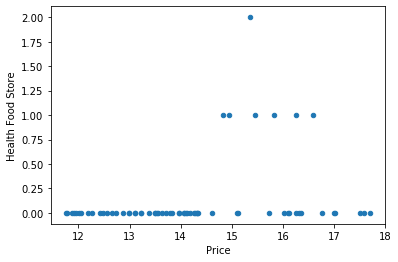

In [80]:
BCN_Clus2.plot(kind='scatter',x='Price',y='Health Food Store')

As it can be seen, there is a large number of neighborhoods with no health food stores and renting prices better than the ones paid by the competence

#### Kmean clustering based on the price vs competence presence in Cluster 2

In [95]:
BCN_Analysis = BCN_Clus2[['Price','Health Food Store']]

**Elbow method to find k**

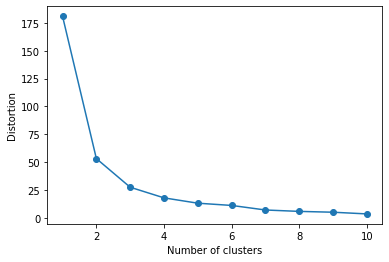

In [96]:
distortions2 = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(BCN_Analysis)
    distortions2.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We select k=3 as the elbow of the curve

In [97]:
# We set number of clusters = 4
kclusters2 = 4

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters2, random_state=0).fit(BCN_Analysis)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10] 

array([1, 3, 1, 3, 3, 3, 3, 0, 2, 2], dtype=int32)

We then insert the sub-cluster labels obtained into the table with Cluster 2 Neighborhoods

In [98]:
# add clustering labels
BCN_Clus2.insert(2, 'Subcluster', kmeans2.labels_)

In [99]:
BCN_Clus2.head()

,Neighborhood,Price,Subcluster,Cluster Labels,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
2,Av. Carrilet,13.11,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rambla Just Oliveras,13.23,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Santa Eulàlia,13.11,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Mercat Nou,13.22,3,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Plaça de Sants,13.38,3,2,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


#### Exploring SubClusters Created

In [100]:
BCN_Insights = BCN_Clus2[['Neighborhood','Price','Subcluster','Health Food Store']]

**Subcluster 0**

In [101]:
BCN_Insights.loc[BCN_Insights['Subcluster']==0]

,Neighborhood,Price,Subcluster,Health Food Store
12,Rocafort,15.10,0,0
33,Tetuan,15.82,0,1
34,Monumental,14.83,0,1
56,Diagonal,15.72,0,0
72,Poblenou,14.94,0,1
73,Llacuna,15.45,0,1
79,Verdaguer,15.12,0,0
95,Hospital Clínic,15.36,0,2


**Subcluster 1**

In [102]:
BCN_Insights.loc[BCN_Insights['Subcluster']==1]

,Neighborhood,Price,Subcluster,Health Food Store
2,Av. Carrilet,13.11,1,0
7,Santa Eulàlia,13.11,1,0
23,Fabra i Puig,11.77,1,0
28,Santa Coloma,11.87,1,0
43,Gorg,12.01,1,0
45,Badalona Pompeu Fabra,11.91,1,0
64,Valldaura,12.18,1,0
69,Besòs Mar,12.98,1,0
82,Guinardó | Hospital de Sant Pau,12.26,1,0
96,Sant Pau | Dos de Maig,12.98,1,0


**Subcluster 2**

In [103]:
BCN_Insights.loc[BCN_Insights['Subcluster']==2]

,Neighborhood,Price,Subcluster,Health Food Store
13,Urgell,16.10,2,0
14,Universitat,16.31,2,0
15,Catalunya,16.99,2,0
16,Urquinaona,16.77,2,0
17,Arc de Triomf,16.58,2,1
18,Marina,16.25,2,0
31,Sant Antoni,16.25,2,1
32,Passeig de Gràcia,16.36,2,0
54,Drassanes,17.51,2,0
55,Liceu,17.58,2,0


**Subcluster 3**

In [104]:
BCN_Insights.loc[BCN_Insights['Subcluster']==3]

,Neighborhood,Price,Subcluster,Health Food Store
3,Rambla Just Oliveras,13.23,3,0
8,Mercat Nou,13.22,3,0
9,Plaça de Sants,13.38,3,0
10,Hostafrancs,13.72,3,0
11,Espanya,14.18,3,0
19,Glòries,14.31,3,0
20,Clot,13.50,3,0
35,Sagrada Família,14.06,3,0
36,Encants,13.56,3,0
46,Zona Universitària,13.96,3,0


#### Display Sub-Clusters in Folium Map

In [109]:
BCN_Insights.columns = ['NOM_ESTACIO', 'Price', 'Subcluster', 'Health Food Store']
BCN_Insights_Map = pd.merge(BCN_Insights, BCN_Data, on = 'NOM_ESTACIO')
BCN_Insights_Map.head()

,NOM_ESTACIO,Price,Subcluster,Health Food Store,CODI_GRUP_ESTACIO,PICTO,Long,Lat,PREU (€/M2)
0,Av. Carrilet,13.11,1,0,6660113,L1,2.102645,41.358522,13.11
1,Rambla Just Oliveras,13.23,3,0,6660114,L1,2.099749,41.364090,13.23
2,Santa Eulàlia,13.11,1,0,6660118,L1,2.128617,41.368816,13.11
3,Mercat Nou,13.22,3,0,6660119,L1,2.133536,41.373003,13.22
4,Plaça de Sants,13.38,3,0,6660120,L1L5,2.135576,41.375532,13.38


In [111]:
latitude = 41.37
longitude= 2.10

# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters2)
ys = [i + x + (i*x)**2 for i in range(kclusters2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BCN_Insights_Map['Lat'], BCN_Insights_Map['Long'], BCN_Insights_Map['NOM_ESTACIO'], BCN_Insights_Map['Subcluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

With the information from the Map and the tables above, we categorize **4 subclusters with different properties:**

- **0: Downtown neighborhoods** with **strong presence of the competence** and **medium prices** 
- **1: Residential Areas** near the Ourskirts with **no competence and low prices**
- **2: Turistic Downtown** with **weak competence and high prices**
- **3: Downtown neighborhoods** with **no presence of competence and medium prices** *(Optimum Area)*

### 5. Conclusions

Exploratory analysis have been performed over Barcelona neighborhoods commerce and real estate data in order to obtain best possible locations for new Health Food Stores.

Main kmeans clustering with k=5 have been performed obtaining 3 main areas 

- Downtown Clusters 0 and 2
- Harbor Cluster 3
- Outskirts Clusters 1 and 4

After further analysis it has been determined that Health Food Stores are working in Cluster 2 areas, so kmeans clustering with k=4 has been performed into this areas based on rent price and competence presence over each neighborhood. 4 main sub-clusters have been obtained:

- **0: Downtown neighborhoods** with **strong presence of the competence** and **medium prices** 
- **1: Residential Areas** near the Ourskirts with **no competence and low prices**
- **2: Turistic Downtown** with **weak competence and high prices**
- **3: Downtown neighborhoods** with **no presence of competence and medium prices** *(Optimum Area)*

So, with the insights obtained, the **list of the most suitable neighborhoods for Health Food Store opening in Barcelona is:**


In [114]:
Final_Locations = BCN_Insights.loc[BCN_Insights['Subcluster']==3]
Final_Locations['NOM_ESTACIO']

3     Rambla Just Oliveras
8               Mercat Nou
9           Plaça de Sants
10             Hostafrancs
11                 Espanya
19                 Glòries
20                    Clot
35         Sagrada Família
36                 Encants
46      Zona Universitària
47             Palau Reial
48          Maria Cristina
49               Les Corts
50        Plaça del Centre
51           Sants Estació
52               Tarragona
57                 Fontana
58                 Lesseps
59               Vallcarca
70      El Maresme | Fòrum
71            Selva de Mar
92               Collblanc
93                   Badal
94                 Entença
Name: NOM_ESTACIO, dtype: object